In [1]:
%pylab inline
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

Populating the interactive namespace from numpy and matplotlib


Import USGS water use data

In [2]:
df = pd.read_csv('cc1.csv')

Drop columns tallying unrelated to fresh water supply (sailine usage)

In [3]:
df.drop(df.columns[[0,2,11,12,14,15,17,18,28,29,31,32,34,35,61,62,64,65,67,68,70,71,73,74,76,77,79,80,82,83,85,86,89,
                    90,92,93,95,96,99,100,102,103,105,106,108,109,110,111,112,113,115,116,117]], axis=1, inplace=True)

In [4]:
df = df.iloc[np.random.permutation(len(df))]

Isolate total fresh water usage

In [5]:
y = df.pop("TO-WFrTo")
y2 = y.copy()

In [6]:
df

,STATEFIPS,COUNTYFIPS,FIPS,YEAR,TP-TotPop,PS-GWPop,PS-SWPop,PS-TOPop,PS-WGWFr,PS-WSWFr,...,PT-WFrTo,PT-Power,PO-WGWFr,PO-WSWFr,PO-WFrTo,PO-Power,PC-WGWFr,PC-WSWFr,PC-WFrTo,PC-Power
2095,39,105,39105,2010,23.770,22.470,0.000,22.470,1.87,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00
2530,48,15,48015,2010,28.417,NaN,NaN,12.962,0.10,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00
3203,72,119,72119,2010,54.304,0.000,54.304,54.304,0.00,13.98,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00
2238,41,61,41061,2010,25.748,18.796,0.000,18.796,4.16,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00
1796,35,3,35003,2010,3.725,NaN,NaN,1.667,0.14,0.04,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00
1085,21,185,21185,2010,60.316,NaN,NaN,24.947,4.22,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00
718,18,43,18043,2010,74.578,NaN,NaN,71.819,1.25,0.00,...,252.76,2296.11,0.02,252.74,252.76,2296.11,0.00,0,0.00,0.00
2891,51,149,51149,2010,35.725,4.467,28.780,33.247,0.30,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00
767,18,141,18141,2010,266.931,NaN,NaN,190.589,22.32,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0.00
1332,27,37,27037,2010,398.552,330.550,57.950,388.500,37.54,3.71,...,260.00,1331.56,0.00,260.00,260.00,1331.56,0.00,0,0.00,0.00


Most null values should be replaced with 0

In [7]:
df = df.fillna(0)

In [8]:
np.random.seed(100)
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=.20)

In [9]:
clf = RandomForestClassifier(n_estimators= 15) 
clf.fit(df,y) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Sort features by importance

In [10]:
imp = clf.feature_importances_ 
names = df.columns 
imp, names = zip(*sorted(zip(imp, names))) 

In [11]:
rf = pd.Series(imp, index = names)
rf1 = rf.copy()

In [12]:
rf.shape

(64L,)

Reduce list to 10 most important features

In [13]:
rf.drop(rf.head(54).index, inplace=True)

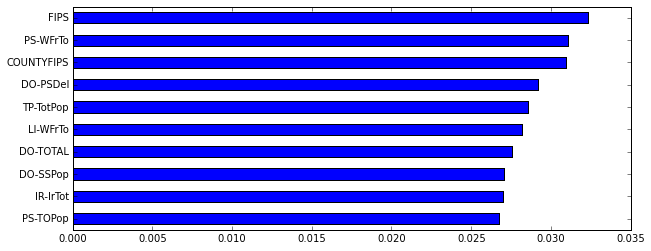

In [14]:
rf.plot(kind="barh", figsize=(10,4))

Since the displayed features contain redundancies from the Public Supply/Domestic category, we need to reduce the
features being assessed to the most important from each industry

In [15]:
pd.set_option('display.height', 120)
pd.set_option('display.max_rows', 120)

height has been deprecated.



In [16]:
rf1

YEAR          0.000000
IG-IrSur      0.000165
IG-IrMic      0.000972
PO-WGWFr      0.002859
PC-WGWFr      0.003936
PO-WSWFr      0.004105
PO-WFrTo      0.004361
PT-WGWFr      0.004761
PC-WSWFr      0.004784
PO-Power      0.005410
PC-WFrTo      0.005559
PT-WSWFr      0.005781
PC-Power      0.006069
PT-WFrTo      0.006599
DO-WSWFr      0.006647
PT-Power      0.007509
IC-IrSur      0.007620
IC-IrMic      0.009801
IG-WGWFr      0.009806
IC-WSWFr      0.010228
IG-WSWFr      0.011210
IN-WSWFr      0.011523
IG-WFrTo      0.012444
IG-IrSpr      0.012667
IG-IrTot      0.012758
IR-IrMic      0.012858
IC-WGWFr      0.012930
IC-WFrTo      0.012938
AQ-WGWFr      0.013134
IR-IrSur      0.013184
AQ-WFrTo      0.013551
PS-SWPop      0.013653
IC-IrSpr      0.013860
AQ-WSWFr      0.014093
IC-IrTot      0.014645
IN-WFrTo      0.016603
PS-GWPop      0.016647
STATEFIPS     0.016976
MI-WGWFr      0.017060
IN-WGWFr      0.017121
MI-WSWFr      0.017843
PS-WSWFr      0.018441
IR-WSWFr      0.020134
MI-WFrTo   

From the above list, the most important features of each industry are determined
(referencing the data's dictionary at the bottom of this page)

In [17]:
X = pd.DataFrame()
X['Year'] = df['YEAR']
X['Thermoelectric_Power_Generated'] = df['PT-Power']
X['Aquaculture_Fresh_Withdrawls'] = df['AQ-WFrTo']
X['Industrial_Fresh_Withdrawls'] = df['IN-WFrTo']
X['Mining_Fresh_Withdrawls'] = df['MI-WFrTo']
X['Irrigation_Sprinkler_Acres'] = df['IR-IrSpr']
X['Livestock_Fresh_Withdrawls'] = df['LI-WFrTo']
X['Total_Population'] = df['TP-TotPop']
X['Public_Supply_Fresh_Withdrawls'] = df['PS-WFrTo']
X['County_FIPS_Code'] = df['COUNTYFIPS']

Year (not needed until more data is collected)

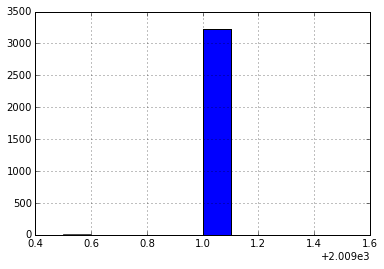

In [18]:
X.Year.hist(bins=10)

In [19]:
X.Year.value_counts(bins=10)

2009.598    3224
2011.608       0
2011.206       0
2010.804       0
2010.402       0
2010.000       0
2009.196       0
2008.794       0
2008.392       0
2007.990       0
Name: Year, dtype: int64

In [20]:
X.Year.describe()

count    3224
mean     2010
std         0
min      2010
25%      2010
50%      2010
75%      2010
max      2010
Name: Year, dtype: float64

Thermoelectric Power Generated

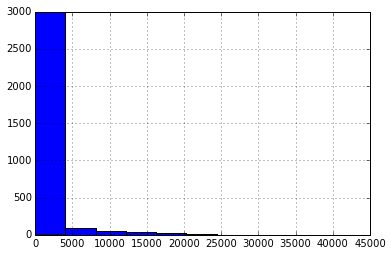

In [21]:
X.Thermoelectric_Power_Generated.hist(bins=10)

In [22]:
X.Thermoelectric_Power_Generated.value_counts(bins=10)

-40.66319       2995
 4066.31900       95
 8132.63800       47
 12198.95700      43
 16265.27600      25
 20331.59500       9
 24397.91400       4
 28464.23300       3
 32530.55200       2
 36596.87100       1
Name: Thermoelectric_Power_Generated, dtype: int64

In [23]:
X.Thermoelectric_Power_Generated.describe()

count     3224.000000
mean       969.519516
std       3367.197900
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      40663.190000
Name: Thermoelectric_Power_Generated, dtype: float64

Aquaculture Fresh Withdrawls

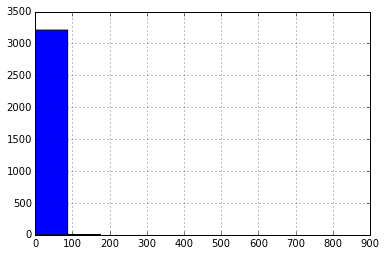

In [24]:
X.Aquaculture_Fresh_Withdrawls.hist(bins=10)

In [25]:
X.Aquaculture_Fresh_Withdrawls.value_counts(bins=10)

-0.87157      3210
 87.15700        6
 784.41300       2
 522.94200       2
 174.31400       2
 435.78500       1
 261.47100       1
 697.25600       0
 610.09900       0
 348.62800       0
Name: Aquaculture_Fresh_Withdrawls, dtype: int64

In [26]:
X.Aquaculture_Fresh_Withdrawls.describe()

count    3224.000000
mean        2.918824
std        28.800643
min         0.000000
25%         0.000000
50%         0.000000
75%         0.142500
max       871.570000
Name: Aquaculture_Fresh_Withdrawls, dtype: float64

Industrial Fresh Withdrawls

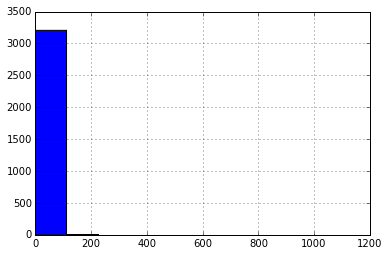

In [27]:
X.Industrial_Fresh_Withdrawls.hist(bins=10)

In [28]:
X.Industrial_Fresh_Withdrawls.value_counts(bins=10)

-1.12275       3206
 112.27500        8
 449.10000        3
 336.82500        3
 224.55000        3
 1010.47500       1
 898.20000        0
 785.92500        0
 673.65000        0
 561.37500        0
Name: Industrial_Fresh_Withdrawls, dtype: int64

In [29]:
X.Industrial_Fresh_Withdrawls.describe()

count    3224.000000
mean        4.640602
std        31.802091
min         0.000000
25%         0.000000
50%         0.020000
75%         0.772500
max      1122.750000
Name: Industrial_Fresh_Withdrawls, dtype: float64

Mining Fresh Withdrawls

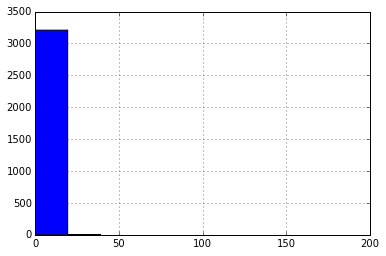

In [30]:
X.Mining_Fresh_Withdrawls.hist(bins=10)

In [31]:
X.Mining_Fresh_Withdrawls.value_counts(bins=10)

-0.1939      3209
 19.3900        9
 38.7800        2
 174.5100       1
 116.3400       1
 77.5600        1
 58.1700        1
 155.1200       0
 135.7300       0
 96.9500        0
Name: Mining_Fresh_Withdrawls, dtype: int64

In [32]:
X.Mining_Fresh_Withdrawls.describe()

count    3224.000000
mean        0.697438
std         4.977676
min         0.000000
25%         0.000000
50%         0.060000
75%         0.290000
max       193.900000
Name: Mining_Fresh_Withdrawls, dtype: float64

Irrigation Sprinkler Acres

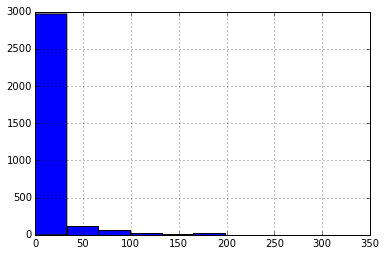

In [33]:
X.Irrigation_Sprinkler_Acres.hist(bins=10)

In [34]:
X.Irrigation_Sprinkler_Acres.value_counts(bins=10)

-0.33007      2968
 33.00700      118
 66.01400       64
 99.02100       28
 165.03500      18
 132.02800      17
 198.04200       4
 297.06300       3
 231.04900       3
 264.05600       1
Name: Irrigation_Sprinkler_Acres, dtype: int64

In [35]:
X.Irrigation_Sprinkler_Acres.describe()

count    3224.000000
mean        9.789501
std        28.090590
min         0.000000
25%         0.150000
50%         0.880000
75%         4.492500
max       330.070000
Name: Irrigation_Sprinkler_Acres, dtype: float64

Livestock Fresh Withdrawls

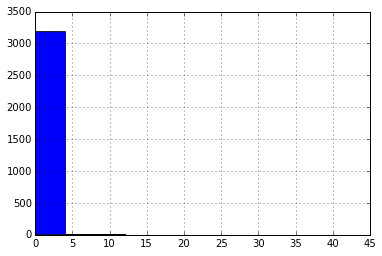

In [36]:
X.Livestock_Fresh_Withdrawls.hist(bins=10)

In [37]:
X.Livestock_Fresh_Withdrawls.value_counts(bins=10)

-0.04044     3185
 4.04400       20
 8.08800       14
 12.13200       2
 36.39600       1
 20.22000       1
 16.17600       1
 32.35200       0
 28.30800       0
 24.26400       0
Name: Livestock_Fresh_Withdrawls, dtype: int64

In [38]:
X.Livestock_Fresh_Withdrawls.describe()

count    3224.000000
mean        0.620717
std         1.325597
min         0.000000
25%         0.110000
50%         0.315000
75%         0.740000
max        40.440000
Name: Livestock_Fresh_Withdrawls, dtype: float64

Total Population

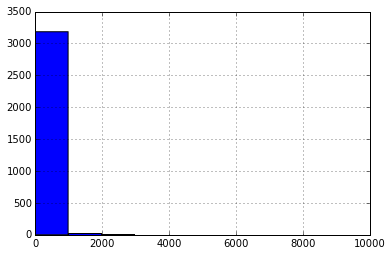

In [39]:
X.Total_Population.hist(bins=10)

In [40]:
X.Total_Population.value_counts(bins=10)

-9.736523       3184
 981.934300       28
 1963.786600       6
 2945.638900       3
 8836.752700       1
 4909.343500       1
 3927.491200       1
 7854.900400       0
 6873.048100       0
 5891.195800       0
Name: Total_Population, dtype: int64

In [41]:
X.Total_Population.describe()

count    3224.000000
mean       96.953486
std       309.162134
min         0.082000
25%        11.309500
50%        26.086500
75%        65.750250
max      9818.605000
Name: Total_Population, dtype: float64

Public Supply Fresh Withdrawls

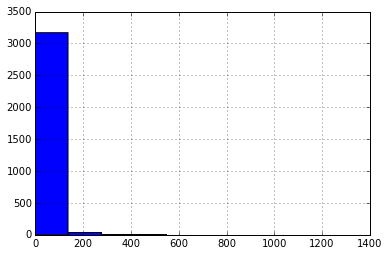

In [42]:
X.Public_Supply_Fresh_Withdrawls.hist(bins=10)

In [43]:
X.Public_Supply_Fresh_Withdrawls.value_counts(bins=10)

-1.37153       3169
 137.15300       37
 411.45900        8
 274.30600        6
 1234.37700       1
 822.91800        1
 685.76500        1
 548.61200        1
 1097.22400       0
 960.07100        0
Name: Public_Supply_Fresh_Withdrawls, dtype: int64

In [44]:
X.Public_Supply_Fresh_Withdrawls.describe()

count    3224.000000
mean       12.933623
std        49.525703
min         0.000000
25%         0.880000
50%         2.455000
75%         7.245000
max      1371.530000
Name: Public_Supply_Fresh_Withdrawls, dtype: float64

County FIPS Code

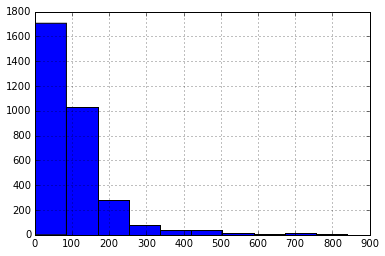

In [45]:
X.County_FIPS_Code.hist(bins=10)

In [46]:
X.County_FIPS_Code.value_counts(bins=20)

0.161      952
42.950     754
84.900     631
126.850    399
168.800    208
210.750     70
252.700     47
294.650     35
336.600     21
378.550     21
420.500     21
462.450     21
504.400     10
672.200      7
588.300      6
714.150      5
798.050      5
756.100      4
630.250      4
546.350      3
Name: County_FIPS_Code, dtype: int64

In [47]:
X.County_FIPS_Code.describe()

count    3224.000000
mean      103.010856
std       106.940829
min         1.000000
25%        35.000000
50%        79.000000
75%       133.000000
max       840.000000
Name: County_FIPS_Code, dtype: float64

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=.20)

In [49]:
clf2 = RandomForestClassifier(n_estimators= 15) 
clf2.fit(X,y2)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [50]:
imp2 = clf2.feature_importances_ 
names2 = X.columns 
imp2, names2 = zip(*sorted(zip(imp2, names2))) 

In [51]:
rf2 = pd.Series(imp2, index =names2)

In [52]:
rf2.shape

(10L,)

The attributes which best predict the each industries' effect on total fresh water consumption

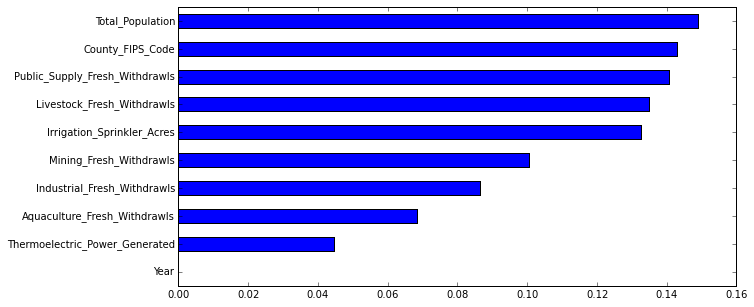

In [53]:
rf2.plot(kind="barh", figsize=(10,5))

In [54]:
r2_score(y_test, clf2.predict(X_test))

1.0

The random forrest works quite well, out of curiosity I'll take a look at a regressive model:

In [55]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [56]:
clf3 = LinearRegression()
clf3.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [57]:
clf3.score(X_train, y_train)

0.50111498656654807

Data dictionary:

In [58]:
df2 = pd.read_csv('data.csv')

In [59]:
df2

,Column Tag,Data Element
0,STATE,State postal abbreviation
1,STATEFIPS,State FIPS code
2,COUNTY,County name
3,COUNTYFIPS,County FIPS code
4,FIPS,Concatenated State-county FIPS code
5,YEAR,Year of data=2010
6,TP-TotPop,"Total population of county, in thousands"
7,PS-GWPop,"Public Supply, population served by groundwate..."
8,PS-SWPop,"Public Supply, population served by surface wa..."
9,PS-TOPop,"Public Supply, total population served, in tho..."
